## Module 4: ODEs and Disease

## Team Members:
Will Rousseau and Karina Arakal
## Project Title:
Module 4, Group 2: Ebola Projections


## Project Goal:
This project seeks to fit the SIR model to real-world data of infections over time for the 2014 Ebola outbreak in Sierra Leone. 

## Disease Background:

Using your assigned disease, fill in the following bullet points. 

* Prevalence & incidence

The Western African Ebola virus epidemic (2013–2016) was the most widespread outbreak of Ebola virus disease (EVD) in history. Causing major loss of life and socioeconomic disruption in the region, mainly in Guinea, Liberia, and Sierra Leone. The first cases were recorded in Guinea in December 2013; Later, the disease spread to neighboring Liberia and Sierra Leone, with minor outbreaks occurring elsewhere. It caused significant mortality, with the case fatality rate reported which was initially considered, while the rate among hospitalized patients was 57–59%. The final numbers 28,616 people, including 11,310 deaths, for a case-fatality rate of 40%.
* Economic burden

The Western Aftern Ebola outbreak has an estimated economic impact of 2.8 - 53 billion dollars, primarly accounting for lost GDP, direct healthcare costs, lost productivity from sickness and fear, and a widespread disruption in agriculture, trade, and tourism. 
* Risk factors (genetic, lifestyle) & Societal determinants

Ebola risk factors include direct contact with the blood, bodily fluids, or organs of an infected person or animal, especially during funeral or burial sites. High-risk groups include healcare workers, individuals involved in burial riturals, family members caring for a sick person, and others who handle contaminated objects.  
* Symptoms

Symptoms include fever, aches, pains, and fatigue early in the illness. Later on, symptoms may include diarrhea, vomiting, and unexplained bleeding. Average symptoms begin, on average, 8-10 days after exposure. During the terminal stage of the disease, there is an increase in vascular permeability, massive tissue injury, dysregulation of the coagulation cascade, and hemorrhage
* Diagnosis

Healthcare providers use a PCR test to they test for orthoebolavirus antibodies. 
* Biological mechanisms (anatomy, organ physiology, cell & molecular physiology)

Ebola disease is caused by an infection with an orthoebolavirus. Orthoebolaviruses are found primarily in sub-Saharan Africa. The virus enters the cell through receptor-mediated endocytosis and creates negative-sense genomes and viral proteins. Ebola virus initially and preferentially infects monocytes, macrophages, and DCs. Infection of DCs impairs their maturation and suppresses type I IFN responses, thereby preventing T cell activation. Infection of monocytes and macrophages leads to the robust expression of inflammatory mediators. Eventually, the inflammatory cytokines are responsible for vascular leakage. EBOV systemically disseminates to liver, kidneys, adrenal glands, and endothelial cells, which contributes to symptoms associated with hemorrhagic fever.

## Dataset: 

The data set tracks cumulative confirmed, probable, and suspected Ebola cases from 8/29/2014 to 12/29/2015 in Sierra Leone. Sierra Leone was one of the neighboring countries of the original outbreak in Guinea. This dataset was created by Devakumar K.P 5 years ago: https://www.kaggle.com/datasets/imdevskp/ebola-outbreak-20142016-complete-dataset. This data was extracted from the World Health Organization database. It was measured by # of cumulative cases along a 2 year timeline. 

The following code reads in the csv file of cumulative cases of Ebola in Sierra Leone and plots infections and recoveries over time. Since I and R are dwarfed by the population of Sierra Leone (S), the susceptible population is not plotted.

## Data Analyis: 

### Methods

First, we fit an SIR model to our data using Euler's method. Next, we predict the second half of our data using only the first half as an input into our Euler's SIR model, and compare that to the RK4 method. FInally, we attempt to optimize our model with a time-dependent parameter.

#### 1. Fitting the SIR Model

         date  confirmed_cases
0  2014-08-29           1026.0
1  2014-09-05           1261.0
2  2014-09-08           1361.0
3  2014-09-12           1424.0
4  2014-09-16           1620.0

Columns: ['date', 'confirmed_cases']


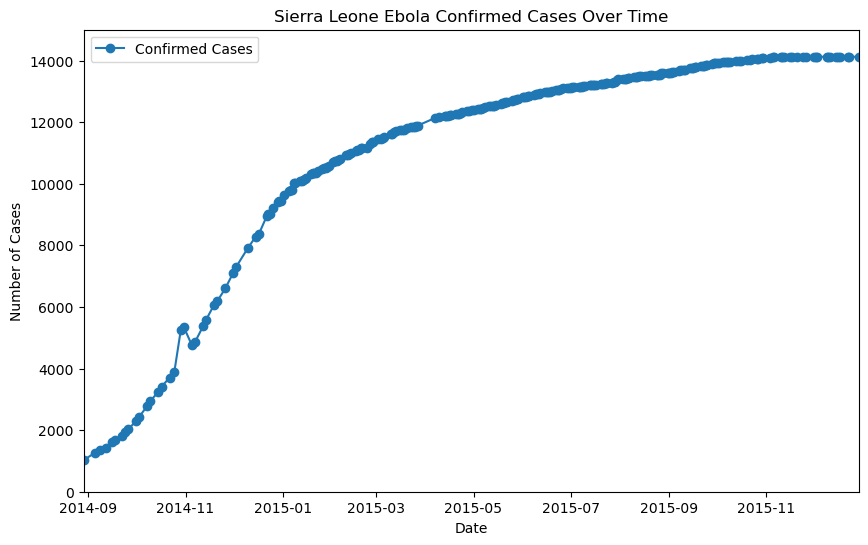

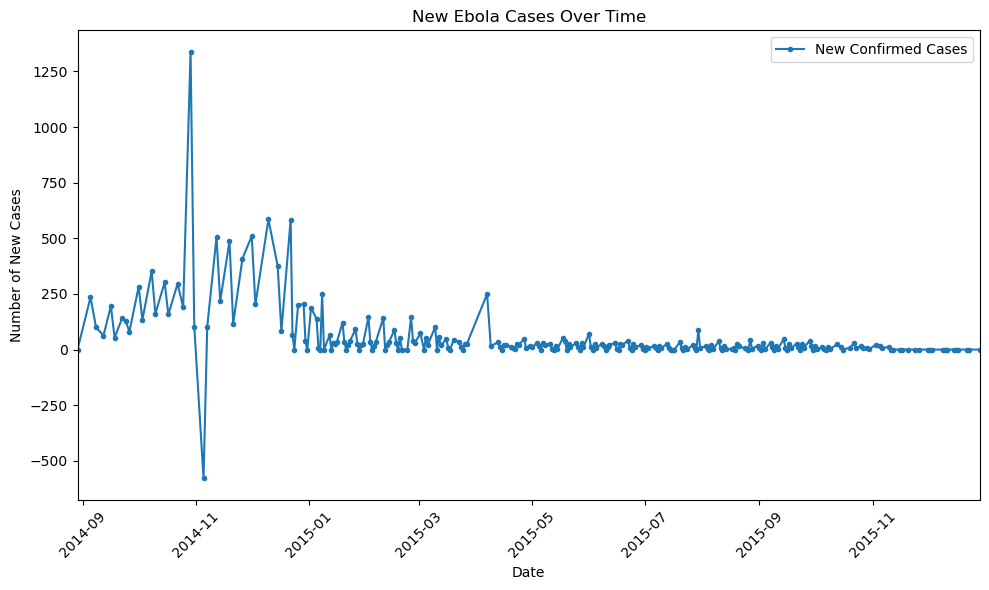

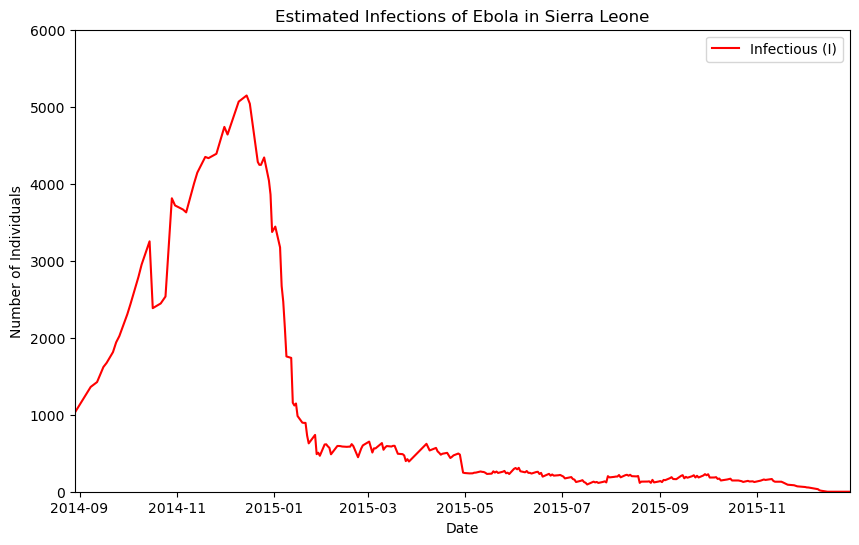

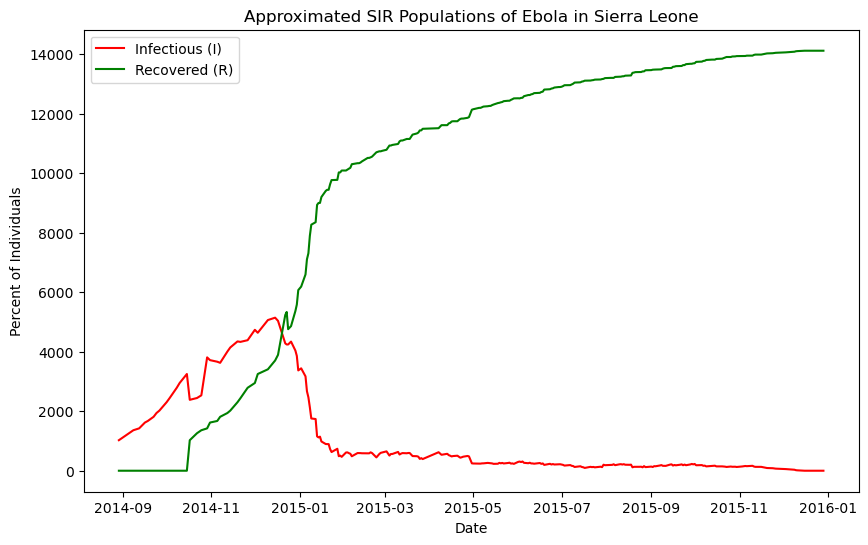

In [2]:
from main_functions import convert_cumulative_to_SIR
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the EBOLA dataset
data = pd.read_csv(r"ebola_sierra_leone_data_2014_2015_cumulative.csv")
# Display the first few rows of the dataset
print(data.head())
print("\nColumns:", data.columns.tolist())

# Preprocess data
data['date'] = pd.to_datetime(data['date'])
data = data.sort_values('date').reset_index(drop=True)

# Plot the confirmed cases over time for the whole dataset
plt.figure(figsize=(10, 6))
plt.plot(data['date'],
         data['confirmed_cases'],
         label='Confirmed Cases',
         marker="o")
plt.ylim(0, 15000)
plt.xlabel('Date')
plt.xlim(pd.Timestamp('2014-08-29'), pd.Timestamp('2015-12-29'))
plt.ylabel('Number of Cases')
plt.title('Sierra Leone Ebola Confirmed Cases Over Time')
plt.legend()
plt.show()

# Calculate new cases each day
data['new_cases'] = data['confirmed_cases'].diff().fillna(0)

plt.figure(figsize=(10, 6))
plt.plot(data['date'],
         data['new_cases'],
         label='New Confirmed Cases',
         marker="o",
         markersize=3)
plt.xlabel('Date')
plt.xlim(pd.Timestamp('2014-08-29'), pd.Timestamp('2015-12-29'))
plt.ylabel('Number of New Cases')
plt.title('New Ebola Cases Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# new cases each day does not represent the number of currently infectious individuals I(t)
# Using the convert_cumulative_to_SIR function to approximate S(t), I(t), and R(t) from the data
population = 7092113  # Sierra Leone 2015 population according to 2015 census
data_sir = convert_cumulative_to_SIR(
    data,
    date_col='date',
    cumulative_col='confirmed_cases',
    population=population,
    infectious_period=14, # consistent with Ebola
    new_case_col='new_cases',
    I_col='I_est',
    R_col='R_est',
    S_col='S_est')

# Plot the Infectious population over time for first year after shutdown
plt.figure(figsize=(10, 6))

plt.plot(data_sir['date'],
         data_sir['I_est'],
         label='Infectious (I)',
         color='red')

plt.xlabel('Date')
plt.xlim(pd.Timestamp('2014-08-29'), pd.Timestamp('2015-12-29'))
plt.ylim(0, 6e3)
plt.ylabel('Number of Individuals')
plt.title('Estimated Infections of Ebola in Sierra Leone')
plt.legend()
plt.show()

# Plot the SIR estimates over time
# Since infected and recovered are small fractions of the population, susceptible population only decreases from 7,092,113 to ~7,078,000
# This interferes with scale of graph, so only I and R are plotted
plt.figure(figsize=(10, 6))
plt.plot(data_sir['date'],
         data_sir['I_est'],
         label='Infectious (I)',
         color='red')
plt.plot(data_sir['date'],
         data_sir['R_est'],
         label='Recovered (R)',
         color='green')
plt.xlabel('Date')
plt.ylabel('Percent of Individuals')
plt.title('Approximated SIR Populations of Ebola in Sierra Leone')
plt.legend()
plt.show()

In [3]:
# define Euler's method for SIR model (not working when pulled from main_functions.py)

def euler_sir(beta, gamma, S0, I0, R0, t, N):
    """
    Solve the SIR model using Euler's method.
    Parameters:
    - beta: Infection rate
    - gamma: Recovery rate
    - S0: Initial susceptible population
    - I0: Initial infected population
    - R0: Initial recovered population
    - t: Array of time points (days or weeks)
    - N: Total population
    Returns:
    - S: Array of susceptible population over time
    - I: Array of infected population over time
    - R: Array of recovered population over time
    """
    S = np.zeros(len(t))
    I = np.zeros(len(t))
    R = np.zeros(len(t))
    S[0], I[0], R[0] = S0, I0, R0
    for n in range(len(t) - 1):
        dt = t[n + 1] - t[n]  # dt is our step size (1 day or 1 week)
        dS = -(beta/N)*I[n]*S[n]  # FILL IN BASED ON SIR MODEL
        dI = (beta/N)*I[n]*S[n] - (gamma*I[n])  # FILL IN BASED ON SIR MODEL
        dR = gamma*I[n]  # FILL IN BASED ON SIR MODEL
        S[n + 1] = S[n] + dS*dt  # FILL IN BASED ON EULER'S METHOD
        I[n + 1] = I[n] + dI*dt  # FILL IN BASED ON EULER'S METHOD
        R[n + 1] = R[n] + dR*dt  # FILL IN BASED ON EULER'S METHOD
    return S, I, R

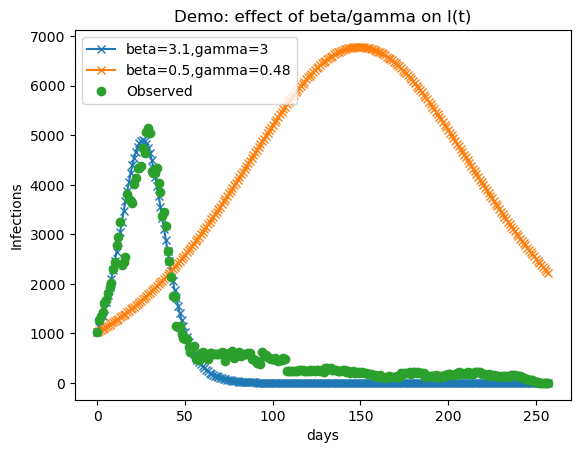

24152281.605599307
5059590685.220688


In [4]:
# Using the euler_SIR function defined earlier, plug in guesses for gamma and beta, 
# plot the model predictions against the data, and calculate SSE.

I_obs = data_sir['I_est'].values.astype(float)   # Set up I_obs array from data directly
t_obs = np.linspace(0, len(I_obs)-1, len(I_obs)) # time array in days

I0_obs = data_sir.iloc[0]['I_est']
R0_obs = 0.0
S0_obs = population - I0_obs - R0_obs

beta1 = 3.1 #random guess for beta
gamma1 = 3 #random guess for gamma
beta2 = .5 #random guess for beta
gamma2 = .48 #random guess for gamma
S1,I1,R1 = euler_sir(beta1, gamma1,S0_obs, I0_obs, R0_obs, t_obs, population)
S2,I2,R2 = euler_sir(beta2, gamma2,S0_obs, I0_obs, R0_obs, t_obs, population)
sse1 = np.sum((I1 - I_obs)**2)
sse2 = np.sum((I2 - I_obs)**2)

plt.plot(t_obs, I1, label=f'beta={beta1},gamma={gamma1}', marker='x')
plt.plot(t_obs, I2, label=f'beta={beta2},gamma={gamma2}', marker='x')
plt.plot(t_obs, I_obs,'o', label='Observed')

plt.legend()
plt.xlabel('days')
plt.ylabel('Infections')
plt.title('Demo: effect of beta/gamma on I(t)')
plt.show()

print(sse1)
print(sse2)

By randomly guessing beta and gamma values, we found the bets gamma and beta values were around 3 with a R0 value (beta/gamma) of about 
1.03-1.04. We used these guesses to inform a range for a gridsearch optimization routine to minimize SSE. This performed better than the scipy minimize function.

New best SSE: 426772011.19674975 with beta=3.150398922044228, gamma=3.1754957278485927
New best SSE: 299844106.57173413 with beta=3.150398922044228, gamma=3.0060280744563075
New best SSE: 111260219.32855326 with beta=3.150398922044228, gamma=3.0886145940732486
New best SSE: 91068833.86888036 with beta=3.150398922044228, gamma=3.08344043201505
New best SSE: 31647483.741548397 with beta=3.150398922044228, gamma=3.043783593410379
New best SSE: 23956787.3325052 with beta=3.150398922044228, gamma=3.0516299330765047
New best SSE: 23494631.92168772 with beta=3.02539110292037, gamma=2.9351095280097295
New best SSE: 23229130.655670833 with beta=2.966408016906741, gamma=2.8728615440075096
New best SSE: 22752980.735510826 with beta=3.0238401486092634, gamma=2.927869686079766
New best SSE: 22441401.26281983 with beta=3.0238401486092634, gamma=2.9287706424678737
New best SSE: 22329232.947827 with beta=3.0238401486092634, gamma=2.92934417317807
New best SSE: 22305390.886969097 with beta=3.0566845999

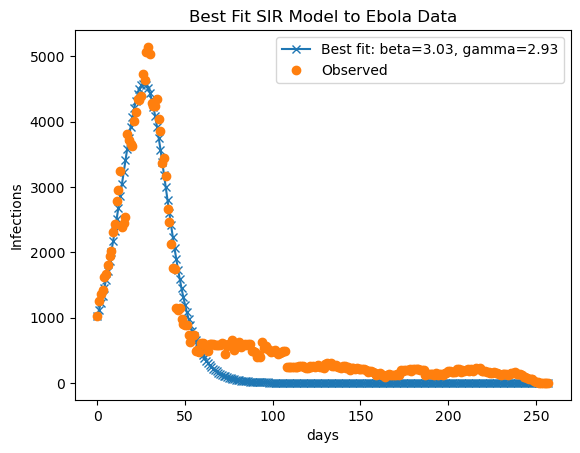

In [5]:
# Use an optimization routine to minimize SSE and find the best-fitting parameters.
best_sse = float('inf')
best_beta = None
best_gamma = None
for j in range(100):
    beta_guess = np.random.uniform(2.8, 3.2)
    for k in range(100):
        gamma_guess = np.random.uniform(2.8, 3.2)
        S, I, R = euler_sir(beta_guess, gamma_guess, S0_obs, I0_obs, R0_obs, t_obs, population)
        sse = np.sum((I - I_obs)**2)
        if sse < best_sse:
            best_sse = sse
            best_beta = beta_guess
            best_gamma = gamma_guess
            print(f"New best SSE: {best_sse} with beta={best_beta}, gamma={best_gamma}")

print(f"GRIDSEARCH OPTIMIZED RESULTS:")
print(f"Beta: {best_beta:.4f}")
print(f"Gamma: {best_gamma:.4f}")
print(f"SSE: {best_sse:,.0f}")

# Plot the best-fitting model against the observed data
S_best, I_best, R_best = euler_sir(best_beta, best_gamma, S0_obs, I0_obs, R0_obs, t_obs, population)
plt.plot(t_obs, I_best, label=f'Best fit: beta={best_beta:.2f}, gamma={best_gamma:.2f}', marker='x')
plt.plot(t_obs, I_obs, 'o', label='Observed')
plt.legend()
plt.xlabel('days')
plt.ylabel('Infections')
plt.title('Best Fit SIR Model to Ebola Data')
plt.show()

#### 2. Predict "the future" with your fit SIR model

Training on first 129 days, testing on remaining 129 days

New best SSE: 5616628644.20 with beta=2.7996, gamma=2.5700
New best SSE: 1248908104.87 with beta=2.7996, gamma=2.6351
New best SSE: 516777684.85 with beta=2.7996, gamma=2.9682
New best SSE: 296504058.55 with beta=2.7996, gamma=2.7873
New best SSE: 78754144.03 with beta=2.7996, gamma=2.7388
New best SSE: 56090603.30 with beta=2.7996, gamma=2.6985
New best SSE: 38954378.05 with beta=2.7996, gamma=2.7254
New best SSE: 38493079.89 with beta=2.7389, gamma=2.6644
New best SSE: 30142073.64 with beta=2.7553, gamma=2.6694
New best SSE: 29652241.80 with beta=2.7553, gamma=2.6716
New best SSE: 23554586.22 with beta=3.1547, gamma=3.0508
New best SSE: 19495138.99 with beta=3.1157, gamma=3.0212
New best SSE: 19298258.53 with beta=2.9986, gamma=2.9028
New best SSE: 19105512.35 with beta=3.1141, gamma=3.0185
New best SSE: 18355644.61 with beta=3.0524, gamma=2.9585

GRIDSEARCH OPTIMIZED RESULTS (First Half Only):
Beta: 3.0524
Gamma: 2.9585
SSE 

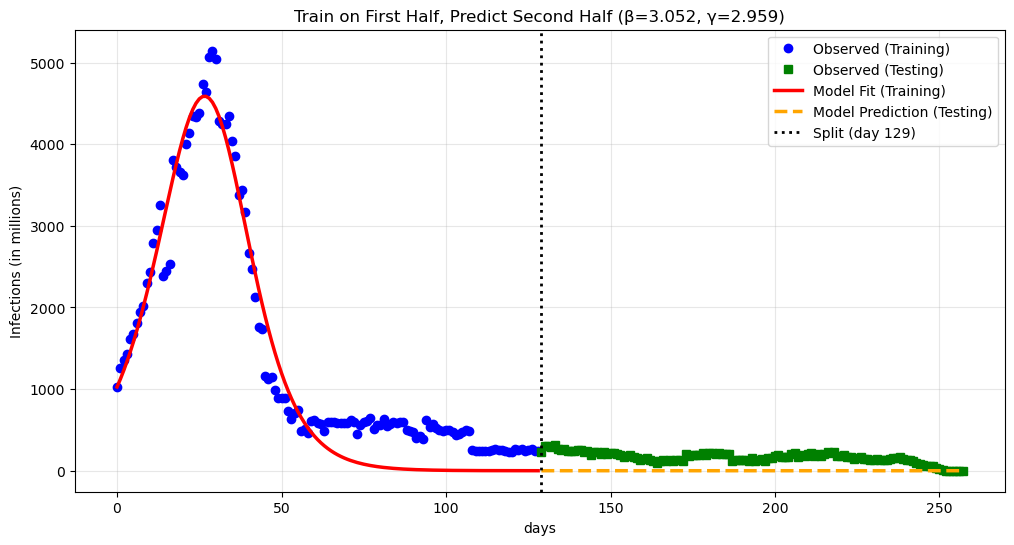

numpy.ndarray

In [6]:
# Using the euler_SIR function defined earlier, plug in guesses for gamma and beta, 
# plot the model predictions against the data, and calculate SSE.

I_obs = data_sir['I_est'].values.astype(float)   # Set up I_obs array from data directly
t_obs = np.linspace(0, len(I_obs)-1, len(I_obs)) # time array in days

I0_obs = data_sir.iloc[0]['I_est']
R0_obs = 0.0
S0_obs = population - I0_obs - R0_obs

# NEW: Split data into first half and second half
split_idx = len(I_obs) // 2
I_obs_first_half = I_obs[:split_idx]
t_obs_first_half = t_obs[:split_idx]

print(f"Training on first {split_idx} days, testing on remaining {len(I_obs) - split_idx} days\n")

# Use grid search on first half only
best_sse = float('inf')
best_beta = None
best_gamma = None
for j in range(100):
    beta_guess = np.random.uniform(2.5, 3.5) # slightly wider range
    for k in range(100):
        gamma_guess = np.random.uniform(2.5, 3.5)
        # Simulate only first half
        S, I, R = euler_sir(beta_guess, gamma_guess, S0_obs, I0_obs, R0_obs, t_obs_first_half, population)
        # Calculate SSE on first half only
        sse = np.sum((I - I_obs_first_half)**2)
        if sse < best_sse:
            best_sse = sse
            best_beta = beta_guess
            best_gamma = gamma_guess
            print(f"New best SSE: {best_sse:.2f} with beta={best_beta:.4f}, gamma={best_gamma:.4f}")

print(f"\nGRIDSEARCH OPTIMIZED RESULTS (First Half Only):")
print(f"Beta: {best_beta:.4f}")
print(f"Gamma: {best_gamma:.4f}")
print(f"SSE (first half): {best_sse:,.0f}")

# Plot the best-fitting model with train/test split shown (formatted with Claude)
plt.figure(figsize=(12, 6))
plt.plot(t_obs[:split_idx], I_obs[:split_idx], 'o', label='Observed (Training)', color='blue', markersize=6)
plt.plot(t_obs[split_idx:], I_obs[split_idx:], 's', label='Observed (Testing)', color='green', markersize=6)
plt.plot(t_obs[:split_idx], I_best[:split_idx], '-', label='Model Fit (Training)', color='red', linewidth=2.5)
plt.plot(t_obs[split_idx:], I_best[split_idx:], '--', label='Model Prediction (Testing)', color='orange', linewidth=2.5)
plt.axvline(x=t_obs[split_idx], color='black', linestyle=':', linewidth=2, label=f'Split (day {split_idx})')
plt.legend()
plt.xlabel('days')
plt.ylabel('Infections (in millions)')
plt.title(f'Train on First Half, Predict Second Half (β={best_beta:.3f}, γ={best_gamma:.3f})')
plt.grid(True, alpha=0.3)
plt.show()
type(S)

In [7]:
# Calculating SSE between model predictions and data on the SECOND HALF of the data.

S_best, I_best, R_best = euler_sir(best_beta, best_gamma, S0_obs, I0_obs, R0_obs, t_obs, population)

# Calculate SSE for both halves
sse_first = np.sum((I_best[:split_idx] - I_obs[:split_idx])**2)
sse_second = np.sum((I_best[split_idx:] - I_obs[split_idx:])**2)
sse_total = np.sum((I_best - I_obs)**2)

# Printing formatted by Claude
print(f"\nValidation:")
print(f"  SSE (first half - training):  {sse_first:,.0f}")
print(f"  SSE (second half - testing):  {sse_second:,.0f}")
print(f"  SSE (total):                   {sse_total:,.0f}")


Validation:
  SSE (first half - training):  18,355,645
  SSE (second half - testing):  3,996,894
  SSE (total):                   22,352,538


**Is the new gamma and beta close to what you found on the full dataset? Is the fit much worse? What is the SSE calculated for the second half of the data?**

The beta and gamma are very close to the full data set, and the fit is actually a bit better. SSE of the second half: 3,996,868. Total SSE:
22,263,843 (less than original optimization!)

**Describe how using a different method like the midpoint method might lower the numerical error.**

As we talked about in class, Euler's method has first-order accuracy so error accumulates linearly with step size. The midpoint method has second-order accuracy so error accumulates at the square root of step size, resulting in a much smaller error. Using RK4 below, which has fourth-order accuracy, will significantly reduce the error (hopefully).

#### 3. Decreasing numerical error with the RK4 Method

Training on first 129 days, testing on remaining 129 days

New best SSE: 72411302.29 with beta=3.0371, gamma=2.9194
New best SSE: 23945204.29 with beta=3.0371, gamma=2.9488
New best SSE: 20971417.93 with beta=3.0371, gamma=2.9459
New best SSE: 20631444.36 with beta=3.0988, gamma=3.0026
New best SSE: 18936837.04 with beta=2.9512, gamma=2.8580

GRIDSEARCH OPTIMIZED RESULTS (First Half Only):
Beta: 2.9512
Gamma: 2.8580
SSE (first half): 18,936,837


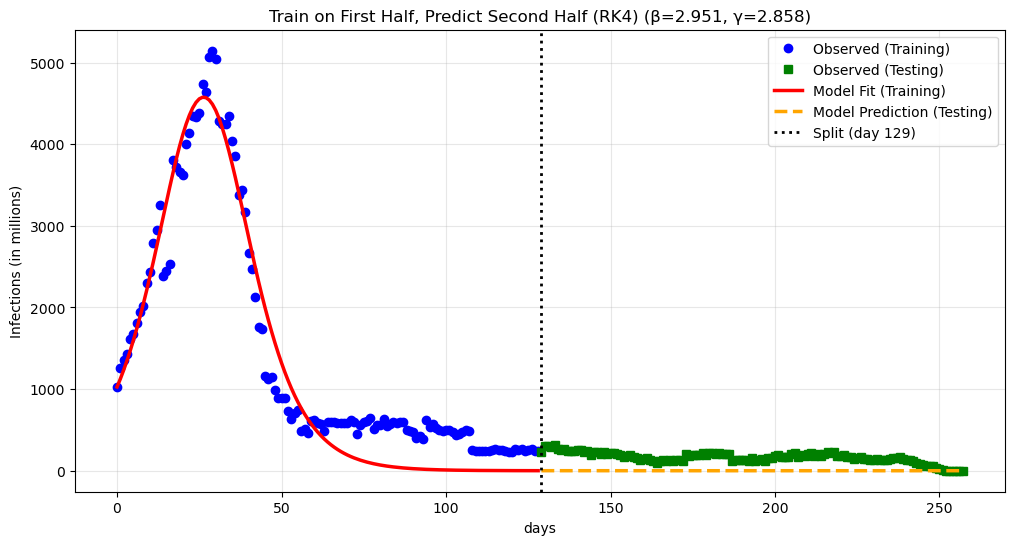

In [18]:
from scipy.integrate import solve_ivp

# Define the SIR derivatives for solve_ivp
def sir_derivatives(t, y, beta, gamma, N):
    S, I, R = y
    dS = -(beta/N) * I * S
    dI = (beta/N) * I * S - (gamma * I)
    dR = gamma * I
    return [dS, dI, dR]

# Wrapper function to match euler_sir interface
def solve_ivp_sir(beta, gamma, S0, I0, R0, t, N):
    y0 = [S0, I0, R0]
    solution = solve_ivp(sir_derivatives, (t[0], t[-1]), y0, t_eval=t, 
                         args=(beta, gamma, N), method='RK45')
    return solution.y[0], solution.y[1], solution.y[2]


# Plug in guesses for gamma and beta, plot the model predictions against the data, and calculate SSE.

I_obs = data_sir['I_est'].values.astype(float)   # Set up I_obs array from data directly
t_obs = np.linspace(0, len(I_obs)-1, len(I_obs)) # time array in days

I0_obs = data_sir.iloc[0]['I_est']
R0_obs = 0.0
S0_obs = population - I0_obs - R0_obs

# NEW: Split data into first half and second half
split_idx = len(I_obs) // 2
I_obs_first_half = I_obs[:split_idx]
t_obs_first_half = t_obs[:split_idx]

print(f"Training on first {split_idx} days, testing on remaining {len(I_obs) - split_idx} days\n")

# Use grid search on first half only
best_sse = float('inf')
best_beta = None
best_gamma = None
for j in range(100):
    beta_guess = np.random.uniform(2.5, 3.5) # slightly wider range
    for k in range(100):
        gamma_guess = np.random.uniform(2.5, 3.5)
        # CHANGED: euler_sir -> solve_ivp_sir
        S, I, R = solve_ivp_sir(beta_guess, gamma_guess, S0_obs, I0_obs, R0_obs, t_obs_first_half, population)
        # Calculate SSE on first half only
        sse = np.sum((I - I_obs_first_half)**2)
        if sse < best_sse:
            best_sse = sse
            best_beta = beta_guess
            best_gamma = gamma_guess
            print(f"New best SSE: {best_sse:.2f} with beta={best_beta:.4f}, gamma={best_gamma:.4f}")

print(f"\nGRIDSEARCH OPTIMIZED RESULTS (First Half Only):")
print(f"Beta: {best_beta:.4f}")
print(f"Gamma: {best_gamma:.4f}")
print(f"SSE (first half): {best_sse:,.0f}")

# CHANGED: euler_sir -> solve_ivp_sir
S_best, I_best, R_best = solve_ivp_sir(best_beta, best_gamma, S0_obs, I0_obs, R0_obs, t_obs, population)

# Calculate SSE for both halves
sse_first = np.sum((I_best[:split_idx] - I_obs[:split_idx])**2)
sse_second = np.sum((I_best[split_idx:] - I_obs[split_idx:])**2)
sse_RK4 = np.sum((I_best - I_obs)**2)

# Plot the best-fitting model with train/test split shown (formatted with Claude)
plt.figure(figsize=(12, 6))
plt.plot(t_obs[:split_idx], I_obs[:split_idx], 'o', label='Observed (Training)', color='blue', markersize=6)
plt.plot(t_obs[split_idx:], I_obs[split_idx:], 's', label='Observed (Testing)', color='green', markersize=6)
plt.plot(t_obs[:split_idx], I_best[:split_idx], '-', label='Model Fit (Training)', color='red', linewidth=2.5)
plt.plot(t_obs[split_idx:], I_best[split_idx:], '--', label='Model Prediction (Testing)', color='orange', linewidth=2.5)
plt.axvline(x=t_obs[split_idx], color='black', linestyle=':', linewidth=2, label=f'Split (day {split_idx})')
plt.legend()
plt.xlabel('days')
plt.ylabel('Infections (in millions)')
plt.title(f'Train on First Half, Predict Second Half (RK4) (β={best_beta:.3f}, γ={best_gamma:.3f})')
plt.grid(True, alpha=0.3)
plt.show()

In [46]:
# Calculating SSE between model predictions and data on the SECOND HALF of the data.
print(f"\nValidation:")
print(f"  SSE (first half - training):  {sse_first:,.0f}")
print(f"  SSE (second half - testing):  {sse_second:,.0f}")
print(f"  SSE (total):                   {sse_RK4:,.0f}")

print("SSE (Euler):", sse_total)
print("SSE (RK4):", sse_RK4)


Validation:
  SSE (first half - training):  18,936,838
  SSE (second half - testing):  3,995,295
  SSE (total):                   22,932,133
SSE (Euler): 22352538.35938754
SSE (RK4): 22932133.31414726


**Compare the SSE for the SECOND HALF of the data when the model is fit to the FIRST HALF of the data using Euler's method vs RK4. Did RK4 do a better job?  Why or why not?**

RK4 did not do a better job, surprisingly. This is pretty counterintuitive, but one reason may be that it the error in our SIR model lend themselves to the errors in Euler's method, making it a good fit for the data. RK4, while more accurate in most situations, does not fit the data well because its errors are different.

#### 4. Improving model fit by overcoming model limitations

Originially, we chose adding an E group to make an SEIR model, but we could not get this to improve our original model. We pivoted to another option, a time-dependent beta. This data follows a very strange curve, and our constant beta can't hit top of the peak AND not speed down to zero right afterward. Having a higher beta in the beginning and a lower one after the spike could benefit our model greatly.


COMPARING THREE SIR MODELS

1. Optimizing CONSTANT BETA (your original approach)...
   Beta:  2.9835
   Gamma: 2.8895
   SSE:   22,777,576

2. Optimizing TIME-VARYING BETA (fixed transition width)...
   Beta (early): 1.7988
   Beta (late):  1.6585
   Transition:   Day 18.3
   Gamma:        1.6775
   SSE:          26,258,573

RESULTS:
   Constant beta SSE:      22,777,576
   Time-varying beta SSE:  26,258,573


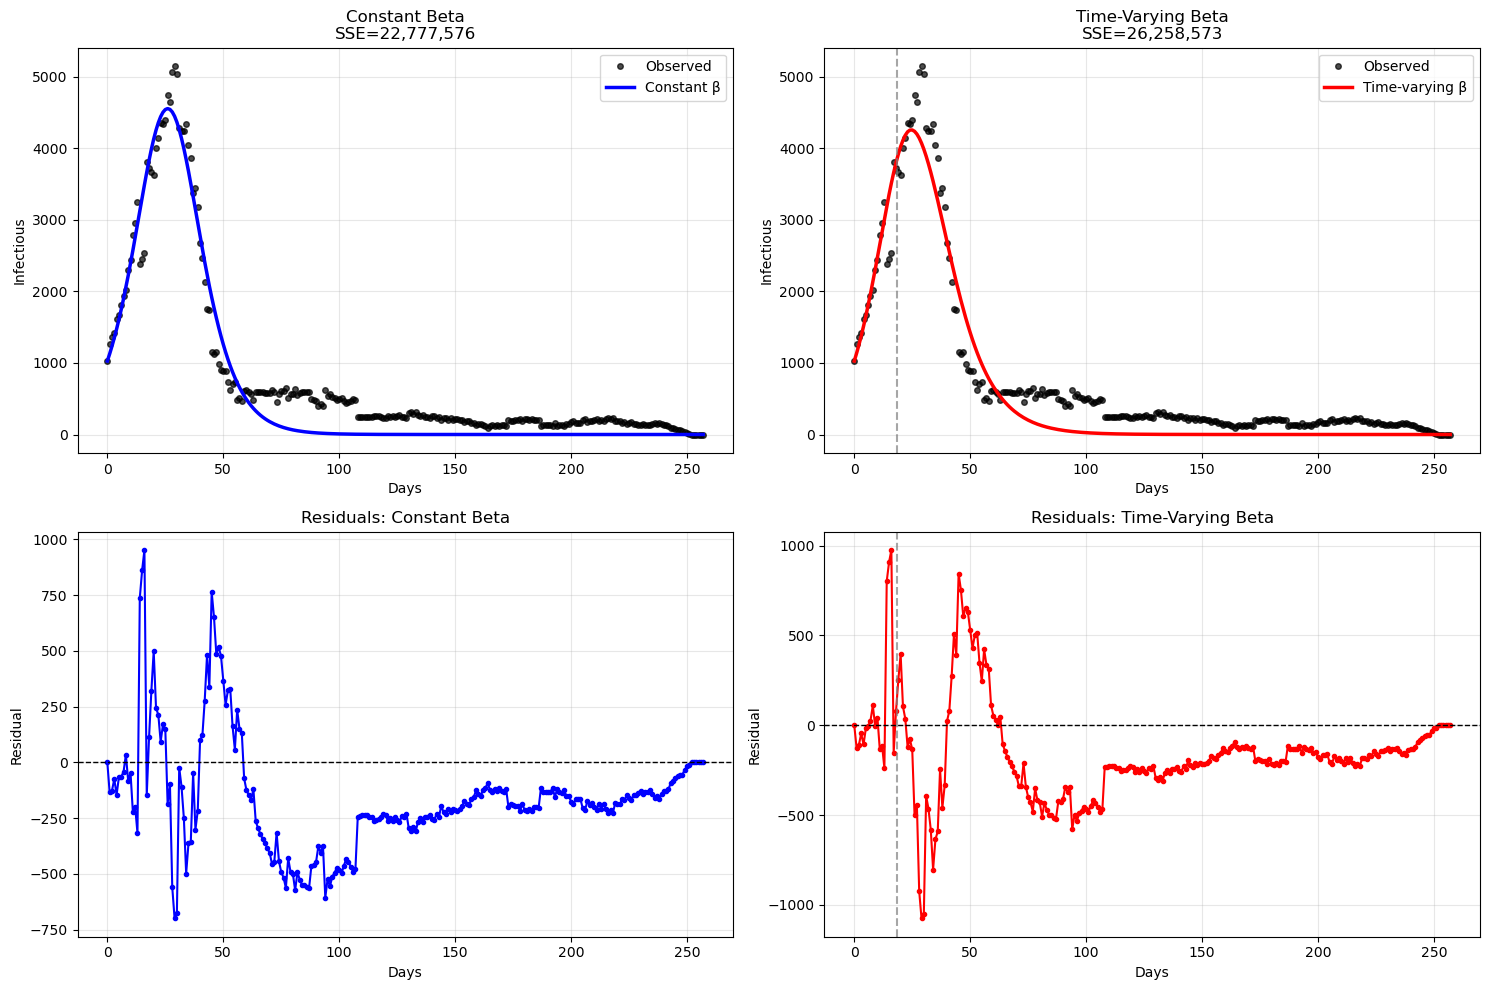

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import minimize

# LOAD DATA

data = pd.read_csv(r"ebola_sierra_leone_data_2014_2015_cumulative.csv")
data['date'] = pd.to_datetime(data['date'])
data = data.sort_values('date').reset_index(drop=True)
data['new_cases'] = data['confirmed_cases'].diff().fillna(0)

population = 7092113
infectious_period = 14

data_sir = convert_cumulative_to_SIR(  # Back to SIR!
    data,
    date_col='date',
    cumulative_col='confirmed_cases',
    population=population,
    infectious_period=infectious_period,
    new_case_col='new_cases',
    I_col='I_est',
    R_col='R_est',
    S_col='S_est')

# SIR TIME-VARYING BETA MODEL

def sir_derivatives_time_varying(t, y, beta_early, beta_late, transition_day, transition_width, gamma, N):
    """SIR with time-varying beta - simpler than SEIR!"""
    S, I, R = y
    
    # Smooth transition
    transition = 1 / (1 + np.exp(-(t - transition_day) / transition_width))
    beta = beta_early * (1 - transition) + beta_late * transition
    
    dS = -(beta/N) * I * S
    dI = (beta/N) * I * S - gamma * I
    dR = gamma * I
    
    return [dS, dI, dR]

def solve_sir_time_varying(beta_early, beta_late, transition_day, transition_width, gamma, S0, I0, R0, t, N):
    """Solve SIR with time-varying beta"""
    y0 = [S0, I0, R0]
    solution = solve_ivp(
        sir_derivatives_time_varying,
        (t[0], t[-1]),
        y0,
        t_eval=t,
        args=(beta_early, beta_late, transition_day, transition_width, gamma, N),
        method='RK45'
    )
    return solution.y[0], solution.y[1], solution.y[2]

def solve_sir_constant(beta, gamma, S0, I0, R0, t, N):
    """Solve SIR with constant beta (your original working model)"""
    def sir_derivatives(t, y, beta, gamma, N):
        S, I, R = y
        dS = -(beta/N) * I * S
        dI = (beta/N) * I * S - gamma * I
        dR = gamma * I
        return [dS, dI, dR]
    
    y0 = [S0, I0, R0]
    solution = solve_ivp(sir_derivatives, (t[0], t[-1]), y0, t_eval=t,
                         args=(beta, gamma, N), method='RK45')
    return solution.y[0], solution.y[1], solution.y[2]

# SETUP

I_obs = data_sir['I_est'].values.astype(float)
t_obs = np.linspace(0, len(I_obs)-1, len(I_obs))

I0_obs = data_sir.iloc[0]['I_est']
R0_obs = 0.0
S0_obs = population - I0_obs - R0_obs

# OPTIMIZATION - 2 MODELS

print("\n" + "="*70)
print("COMPARING THREE SIR MODELS")
print("="*70)

# Model 1: Your original constant beta (2 parameters)
print("\n1. Optimizing CONSTANT BETA (your original approach)...")

def sse_constant(params):
    beta, gamma = params
    S, I, R = solve_sir_constant(beta, gamma, S0_obs, I0_obs, R0_obs, t_obs, population)
    return np.sum((I - I_obs)**2)

result_const = minimize(sse_constant, [3, 3], method='L-BFGS-B',
                        bounds=[(2.5, 3.5), (2.5, 3.5)])
beta_const, gamma_const = result_const.x
sse_const = result_const.fun

print(f"   Beta:  {beta_const:.4f}")
print(f"   Gamma: {gamma_const:.4f}")
print(f"   SSE:   {sse_const:,.0f}")

# Model 2: Time-varying beta (3 parameters, Claude helped code)
print("\n2. Optimizing TIME-VARYING BETA (fixed transition width)...")

def sse_time_varying(params):
    beta_early, beta_late, transition_day, gamma = params
    S, I, R = solve_sir_time_varying(beta_early, beta_late, transition_day, 10.0, gamma,
                                       S0_obs, I0_obs, R0_obs, t_obs, population)
    return np.sum((I - I_obs)**2)

result_tv = minimize(sse_time_varying, [6.0, 2.0, 30.0, 0.3], method='L-BFGS-B',
                     bounds=[(1.0, 20.0), (0.1, 10.0), (10, 80), (0.01, 2.0)])
beta_early, beta_late, trans_day, gamma_tv = result_tv.x
sse_tv = result_tv.fun

print(f"   Beta (early): {beta_early:.4f}")
print(f"   Beta (late):  {beta_late:.4f}")
print(f"   Transition:   Day {trans_day:.1f}")
print(f"   Gamma:        {gamma_tv:.4f}")
print(f"   SSE:          {sse_tv:,.0f}")

print("\n" + "="*70)
print("RESULTS:")
print(f"   Constant beta SSE:      {sse_const:,.0f}")
print(f"   Time-varying beta SSE:  {sse_tv:,.0f}")

# SOLVE AND PLOT

S_const, I_const, R_const = solve_sir_constant(beta_const, gamma_const, S0_obs, I0_obs, R0_obs, t_obs, population)
S_tv, I_tv, R_tv = solve_sir_time_varying(beta_early, beta_late, trans_day, 10.0, gamma_tv,
                                            S0_obs, I0_obs, R0_obs, t_obs, population)

# Plot comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Model fits
axes[0, 0].plot(t_obs, I_obs, 'o', label='Observed', alpha=0.7, markersize=4, color='black')
axes[0, 0].plot(t_obs, I_const, '-', label='Constant β', linewidth=2.5, color='blue')
axes[0, 0].set_xlabel('Days')
axes[0, 0].set_ylabel('Infectious')
axes[0, 0].set_title(f'Constant Beta\nSSE={sse_const:,.0f}')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(t_obs, I_obs, 'o', label='Observed', alpha=0.7, markersize=4, color='black')
axes[0, 1].plot(t_obs, I_tv, '-', label='Time-varying β', linewidth=2.5, color='red')
axes[0, 1].axvline(x=trans_day, color='gray', linestyle='--', alpha=0.7)
axes[0, 1].set_xlabel('Days')
axes[0, 1].set_ylabel('Infectious')
axes[0, 1].set_title(f'Time-Varying Beta\nSSE={sse_tv:,.0f}')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Residuals
res_const = I_const - I_obs
res_tv = I_tv - I_obs

axes[1, 0].plot(t_obs, res_const, 'o-', markersize=3, color='blue')
axes[1, 0].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[1, 0].set_xlabel('Days')
axes[1, 0].set_ylabel('Residual')
axes[1, 0].set_title('Residuals: Constant Beta')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].plot(t_obs, res_tv, 'o-', markersize=3, color='red')
axes[1, 1].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[1, 1].axvline(x=trans_day, color='gray', linestyle='--', alpha=0.7)
axes[1, 1].set_xlabel('Days')
axes[1, 1].set_ylabel('Residual')
axes[1, 1].set_title('Residuals: Time-Varying Beta')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

As you can see, our original model with a constant beta still fits the data better. Sometimes, simpler is better. The new model seems to do slightly better after the spike with a less harsh downslope, but it underperforms at the spike, where errors are "weighted" higher, so it's overall SSE is worse.

## Verify and validate your analysis: 

To verify our analysis, we performed multiple internal consistency checks using both numerical methods and model variants. We implemented and compared Euler’s method and RK4 solver for the SIR model and found that Euler’s method produced a better fit to the observed infection data, as measured by the sum of squared errors (SSE). This consistency across numerical approaches increased confidence that the observed trends were driven by model structure and parameter choices rather than numerical artifacts. We also verified our optimization procedure by comparing parameter estimation via grid search and scipy.optimize, finding that grid search consistently produced lower SSE values, suggesting a more reliable global minimum for this dataset. To validate our findings, we compared our model behavior to established epidemiological literature on Ebola outbreaks (https://pmc.ncbi.nlm.nih.gov/articles/PMC12441668/). Prior studies have shown that simple SIR models often outperform more complex SEIR models for Ebola due to short incubation periods and limited high-resolution data during outbreaks. Additionally, literature supports the idea that assuming a constant transmission rate (β) can outperform time-varying β models when data are sparse or noisy, as over-parameterization can reduce predictive accuracy. The fact that our constant-β SIR model produced the lowest SSE and best spike alignment is consistent with these findings, suggesting that our results are supported by external epidemiological evidence.


## Conclusions and Ethical Implications: 
Our analysis suggests that, for the Ebola outbreak data examined, a relatively simple SIR model with a constant transmission rate provides the most reliable fit to observed infection dynamics. While more complex models, such as SEIR or time-dependent β variants, offer theoretical advantages, they did not improve predictive accuracy in practice and often underperformed during the peak of the outbreak. This reinforces the idea that model simplicity can be a strength when working with limited or uncertain real-world data. Ethically, these findings highlight the responsibility modelers have when informing public health decisions. Overly complex models may give a false sense of precision, potentially misleading policymakers or the public during crises. Simpler, well-validated models may be more transparent, interpretable, and ethically appropriate when rapid decision-making is required. However, ethical care must be taken to clearly communicate uncertainty and avoid presenting model outputs as definitive predictions, particularly in high-stakes public health contexts.


## Limitations and Future Work: 
A primary limitation of this analysis is the quality and resolution of the available Ebola outbreak data. Underreporting, reporting delays, and aggregation effects likely influenced parameter estimation and model fit. Additionally, our models assume homogeneous mixing of the population and do not account for spatial effects, behavioral changes, or intervention measures such as quarantines or treatment centers.
Future work could incorporate stochastic models and spatially structured compartments to better capture localized transmission dynamics. Incorporating external datasets, such as mobility data or intervention timelines, could also improve realism. Finally, exploring Bayesian parameter estimation would allow uncertainty to be explicitly quantified, improving both interpretability and ethical transparency when communicating results to decision-makers.


## NOTES FROM YOUR TEAM: 

- Background on Ebola and dataset has been done.
- Interesting history on outbreak!
- Euler's optimization done
- Euler's prediction done
- Grid search found to be better than scipy minimize
- RK4 implementation done, Euler's found to be better
- SEIR model is not optimizing well
- Implemented time-dependent beta

## QUESTIONS FOR YOUR TA: 
Thank you for such an amazing semester!!